# Import basic modules and load data
Do a simple research about dataset

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fat_df = pd.read_csv('bodyfat.csv')

In [13]:
fat_df.sample(10)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
137,1.0325,29.4,43,187.75,74.00,37.7,97.8,98.6,100.6,63.6,39.2,23.8,34.3,28.4,17.7
131,1.0472,22.7,40,171.25,70.50,36.3,94.6,90.3,99.1,60.3,38.5,23.0,31.2,28.4,17.1
40,1.0217,34.5,45,262.75,68.75,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
64,1.0264,32.3,57,205.50,70.00,40.1,105.3,105.5,108.3,65.0,41.2,24.7,35.3,31.1,18.4
206,1.0250,32.9,44,166.00,65.50,39.1,100.6,93.9,100.1,58.9,37.6,21.4,33.1,29.5,17.3
245,1.0641,15.2,68,155.50,69.25,36.3,97.4,84.3,94.4,54.3,37.5,22.6,29.2,27.3,18.5
163,1.0644,15.1,34,140.00,70.50,36.0,89.2,83.4,89.6,52.4,35.6,20.4,28.3,26.2,16.5
62,1.0298,30.7,54,193.25,70.25,38.0,107.6,102.4,99.4,61.0,39.4,23.6,32.7,29.9,19.1
49,1.0903,4.0,47,127.50,66.75,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8
102,1.0530,20.1,41,172.75,71.25,36.3,96.7,89.2,98.3,60.0,38.4,23.2,31.0,29.2,18.4


In [14]:
fat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [15]:
fat_df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [16]:
fat_df.shape

(252, 15)

In [19]:
fat_df.isnull().values.any()

False

In [27]:
(fat_df == 0).sum()

Density    0
BodyFat    1
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [35]:
fat_df.loc[fat_df['BodyFat']==0.0]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
181,1.1089,0.0,40,118.5,68.0,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


In [39]:
fat_df.drop(fat_df[fat_df['BodyFat'] == 0].index, axis=0, inplace=True)

In [40]:
fat_df.loc[fat_df['BodyFat']==0]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


# Split dataset into train and test sets.

In [63]:
from sklearn.model_selection import train_test_split

X = fat_df.drop('BodyFat', axis = 1)
y = fat_df['BodyFat']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Check our split

c:\Users\barto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


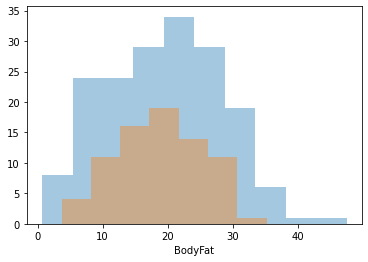

In [64]:
fig, ax = plt.subplots()
for a in [y_train, y_test]:
    sns.distplot(a, ax=ax, kde=False)

In [65]:
from scipy import stats
#Performs the Kolmogorov-Smirnov test for goodness of fit.
stats.kstest(y_train, y_test)

KstestResult(statistic=0.14218045112781955, pvalue=0.20872174796385778)

In [66]:
X_train.shape

(175, 14)

In [67]:
X_test.shape

(76, 14)

In [68]:
y_train.shape

(175,)

In [69]:
y_test.shape

(76,)

In [70]:
X_train.describe(include='all')

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.00000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,1.055163,44.474286,178.290286,69.890000,37.952000,100.804000,92.556571,99.88400,59.346286,38.514857,23.065714,32.154286,28.692571,18.238857
std,0.020143,12.872861,27.734305,4.026364,2.356059,8.379685,10.566666,6.89944,5.193395,2.385012,1.554035,3.034528,2.073367,0.954649
min,0.995000,22.000000,125.250000,29.500000,31.100000,83.400000,70.400000,85.30000,49.300000,33.000000,19.700000,24.800000,21.000000,15.800000
25%,1.040700,35.000000,159.000000,68.125000,36.400000,94.000000,84.450000,95.25000,55.900000,36.900000,22.050000,30.150000,27.300000,17.600000
50%,1.053800,44.000000,176.750000,70.000000,38.000000,99.800000,90.900000,99.30000,59.000000,38.400000,22.800000,31.800000,28.800000,18.300000
75%,1.071950,52.500000,199.000000,71.875000,39.650000,105.800000,99.750000,103.80000,62.200000,39.950000,24.000000,34.550000,30.100000,18.800000
max,1.099100,81.000000,262.750000,77.750000,43.900000,128.300000,126.200000,125.60000,74.400000,46.000000,33.700000,39.100000,33.800000,21.400000


<AxesSubplot:>

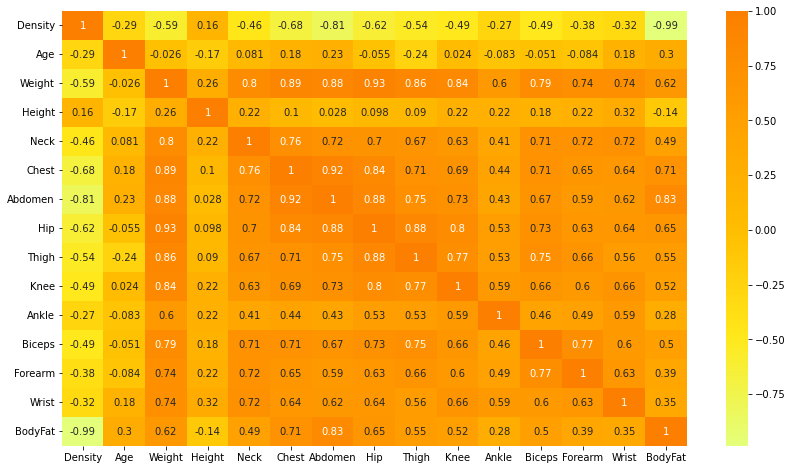

In [72]:
plt.figure(figsize=(14,8))
sns.heatmap(X_train.join(y_train).corr(),cmap='Wistia', annot=True)

c:\Users\barto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\barto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


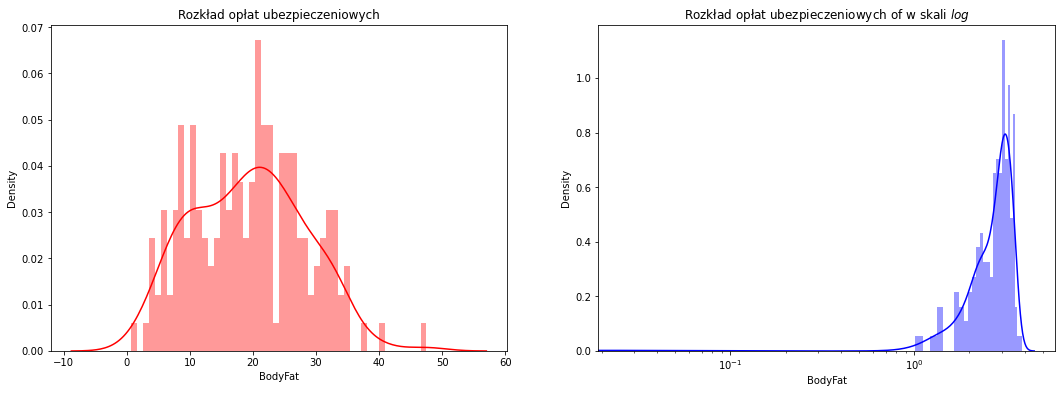

In [76]:
f = plt.figure(figsize=(18, 6))
ax = f.add_subplot(121)
sns.distplot(y_train, bins=50, color="r", ax=ax)
ax.set_title("Rozkład opłat ubezpieczeniowych")

ax = f.add_subplot(122)
sns.distplot(np.log(y_train), bins=40, color="b", ax=ax)
ax.set_title("Rozkład opłat ubezpieczeniowych of w skali $log$")
ax.set_xscale("log")

In [77]:
from scipy.stats import boxcox

y_bc, lam, ci = boxcox(y_train, alpha=0.05)

# df['charges'] = y_bc
# it did not perform better for this model!
ci, lam

((0.5072755146118888, 0.9943525538127285), 0.7425523835035088)

(array([ 2., 12., 23., 21., 30., 36., 28., 20.,  2.,  1.]),
 array([-0.31335005,  1.95090019,  4.21515043,  6.47940068,  8.74365092,
        11.00790116, 13.27215141, 15.53640165, 17.8006519 , 20.06490214,
        22.32915238]),
 <BarContainer object of 10 artists>)

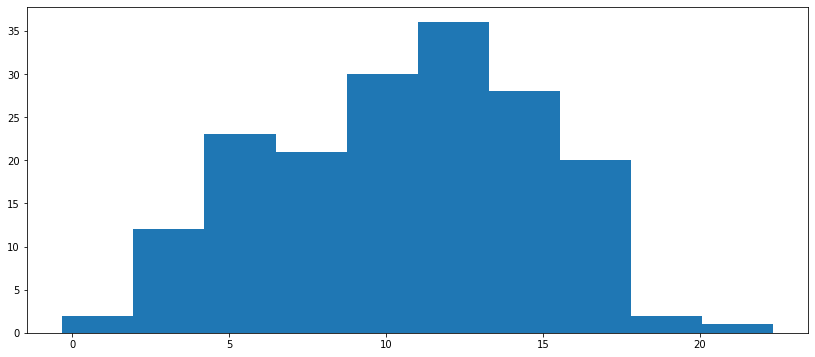

In [78]:
plt.figure(figsize=(14,6))
plt.hist(y_bc)

<AxesSubplot:>

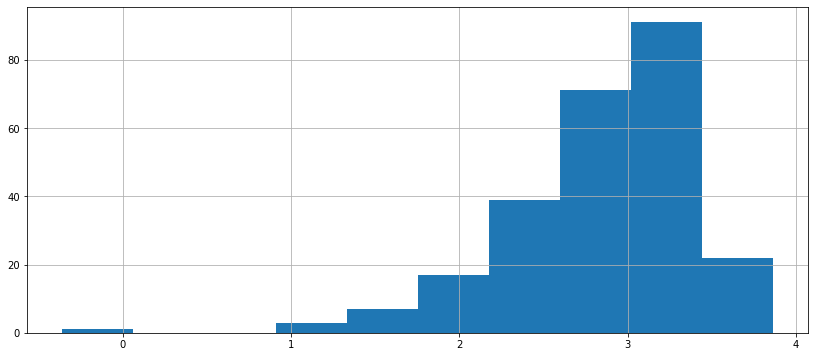

In [79]:
plt.figure(figsize=(14,6))
np.log(fat_df['BodyFat']).hist()

In [81]:
from scipy import stats

print(f"Test normalość dla zmiennej po transformacji Box Coxa: \n{stats.shapiro(y_bc)}")
print(
    f"Test normalość dla zmiennej po prostej transformacji logarytmicznej: \n{stats.shapiro(np.log(fat_df['BodyFat']))}"
)

Test normalość dla zmiennej po transformacji Box Coxa: 
ShapiroResult(statistic=0.9879832863807678, pvalue=0.14248088002204895)
Test normalość dla zmiennej po prostej transformacji logarytmicznej: 
ShapiroResult(statistic=0.9059879183769226, pvalue=1.9460620614975e-11)
